# Übung 8 - JobPosts Similarity (Ansatz 1)
First only testet on feature "category"

1. Implementation of Tf-id-vectors
2. Implementation of cosine-simiarity
3. Ranking (not implemented yet)
4. Topic modelling (not implemented yet)

####  1. Imports

In [1]:
import pandas as pd
import numpy as np
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

#### 2. Load Dataset
Loading the dataset: "data_scientist_united_states_job_postings_jobspikr.xlsx"

In [2]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
df = pd.read_excel("./data_scientist_united_states_job_postings_jobspikr.xlsx")
df

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 06:26:22,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 06:33:41,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 06:33:35,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 06:33:42,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 06:48:23,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 02:55:15,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,...,Join Upstart and help build the future of cred...,Full Time,$100k - 135k | Equity,Stackoverflow,NaN,1569916870107016,NaN,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>_x000D_\n<p><span>Compe...
9996,2019-10-01 02:50:33,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916870211396,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>_x000D_\n<p><span>Locat...
9997,2019-09-26 02:53:10,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,Job Summary: Would you like to play a part in ...,Full Time,NaN,Stackoverflow,NaN,1569916870956579,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN
9998,2019-09-27 02:41:31,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916871226964,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>_x000D_\n<p><span>Locat...


#### 3. Vectorize documents into tf-idf-vectors
For more Information:
- TfidVectorizer() (scikit learn): https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
- sparse.csr_matrix (scipy): https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
- convert matrix to list (scipy): https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.toarray.html#scipy.sparse.csr_matrix.toarray

#### 3.1 Convert pandas Series into array

In [8]:
corpus = list(df["category"].dropna().iloc[0:100])
#corpus

#### 3.2 Remove digits and special chars
may change

In [9]:
#A small function to remove digits and special chars like: ?, , 
def clean_text(documents):
  nlp = spacy.load("en_core_web_sm")
  new_corpus = []
  for document in documents:
    filler = ""
    doc = nlp(document)
    for token in doc:
      if token.is_alpha:
        filler += token.text + " "

    new_corpus += [filler]

  return new_corpus

In [10]:
new_corpus = clean_text(corpus)

In [12]:
#new_corpus

#### 3.3 Vectorize documents and words 

In [13]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', use_idf=True)
X = vectorizer.fit_transform(new_corpus)
X

<100x32 sparse matrix of type '<class 'numpy.float64'>'
	with 222 stored elements in Compressed Sparse Row format>

#### 3.4 Get feature names

In [14]:
names = vectorizer.get_feature_names_out()
names

array(['accounting', 'agriculture', 'architecture', 'arts', 'banking',
       'biotech', 'business', 'computer', 'design', 'education',
       'engineering', 'entertainment', 'finance', 'financial', 'fishing',
       'food', 'healthcare', 'internet', 'life', 'loans', 'manufacturing',
       'mechanical', 'media', 'military', 'operations', 'physical',
       'publishing', 'science', 'services', 'social', 'technology',
       'training'], dtype=object)

In [18]:
X.toarray().shape, names.shape

((100, 32), (32,))

#### 3.3 Reshaping
Reshaping array shape (100, 3757) to shape (3757, 100) so it more sense for understanding. Rows for each word name and column for each document (here 100 of corpus)

In [20]:
reshaped = X.toarray().reshape(32, 100)
#reshaped

#### 3.4 Visualize
not fully implemented yet

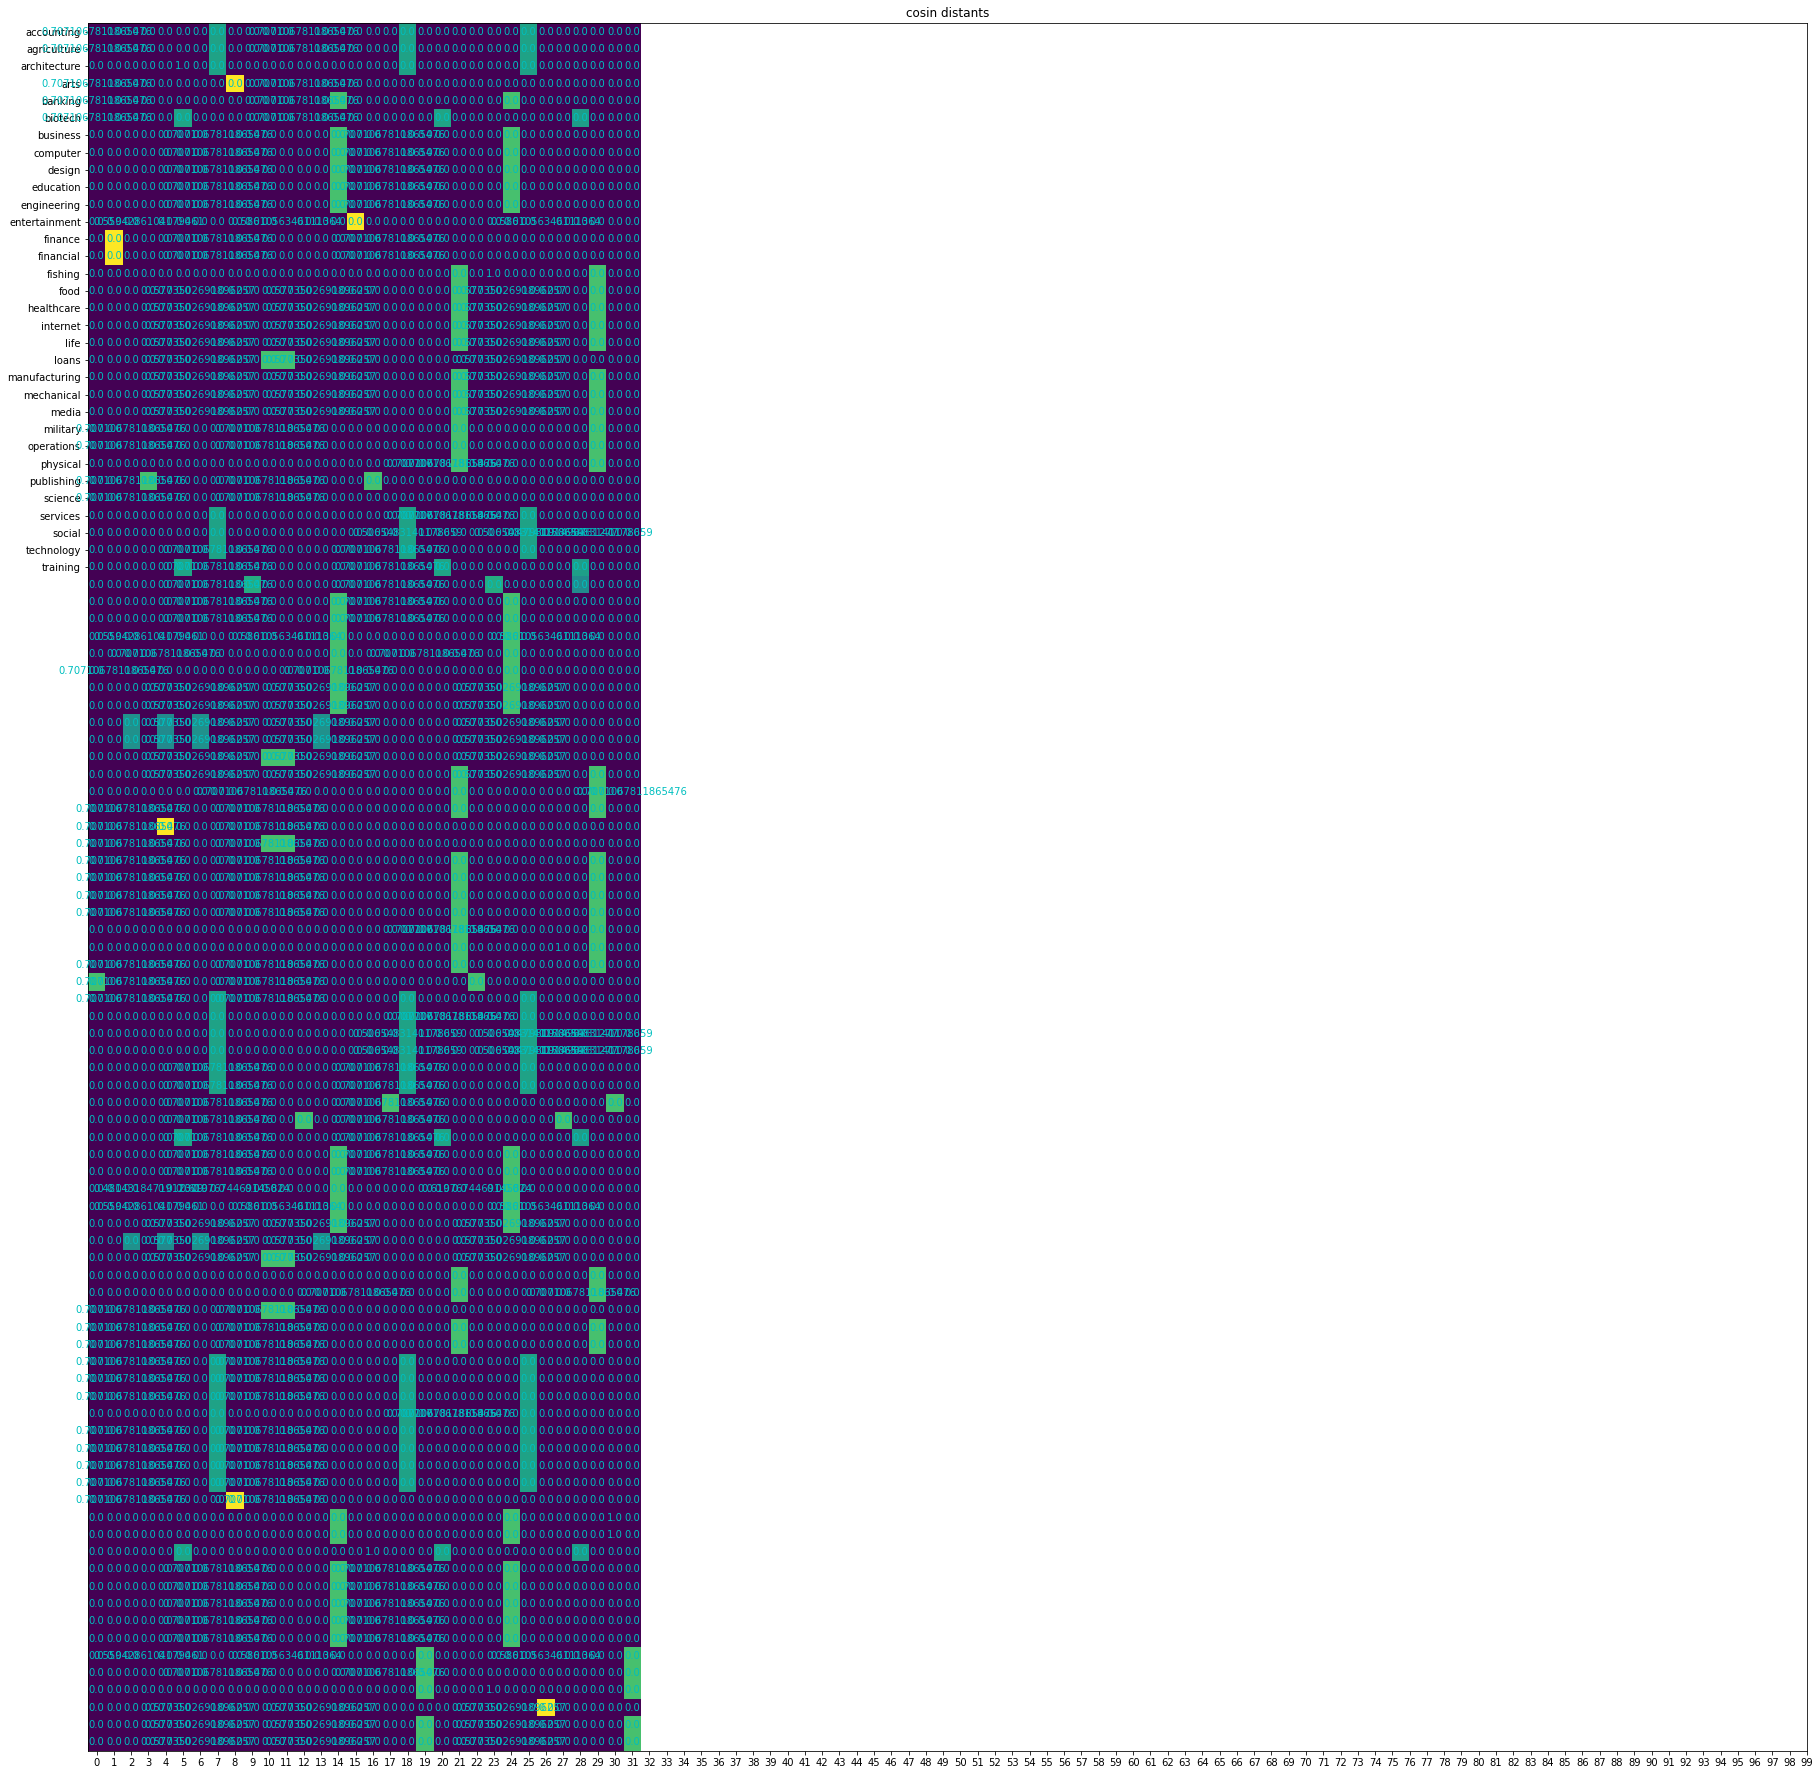

In [58]:
#not finished yet
fig = plt.figure(figsize=(25, 25))
ax = plt.axes()
im = ax.imshow(np.flip(X.toarray()))

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(100))
ax.set_yticks(np.arange(len(names)))

ax.set_xticklabels(np.arange(100))
ax.set_yticklabels(names)


for i in range(100):
    for j in range(len(names)):
        text = ax.text(j, i, X.toarray()[i, j],
                       ha="center", va="center", color="c")
        


ax.set_title("cosin distants")
fig.tight_layout()
plt.show()

#### 4. Check simalirity between vectors with cosine distance

For more Information:
- cosine simalirity (scikit learn) : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html#sklearn.metrics.pairwise.cosine_similarity

- Heatmap (matplotlib): https://matplotlib.org/3.4.3/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py

#### 4.1 calculate similarities with cosine similarity

In [21]:
matrix = cosine_similarity(reshaped, Y=None)

In [22]:
matrix.shape

(32, 32)

In [34]:
test = matrix[0:10, 0:10]
test.shape

(10, 10)

#### 4.2 Visualize cosine matrix
For testing only 10 instances

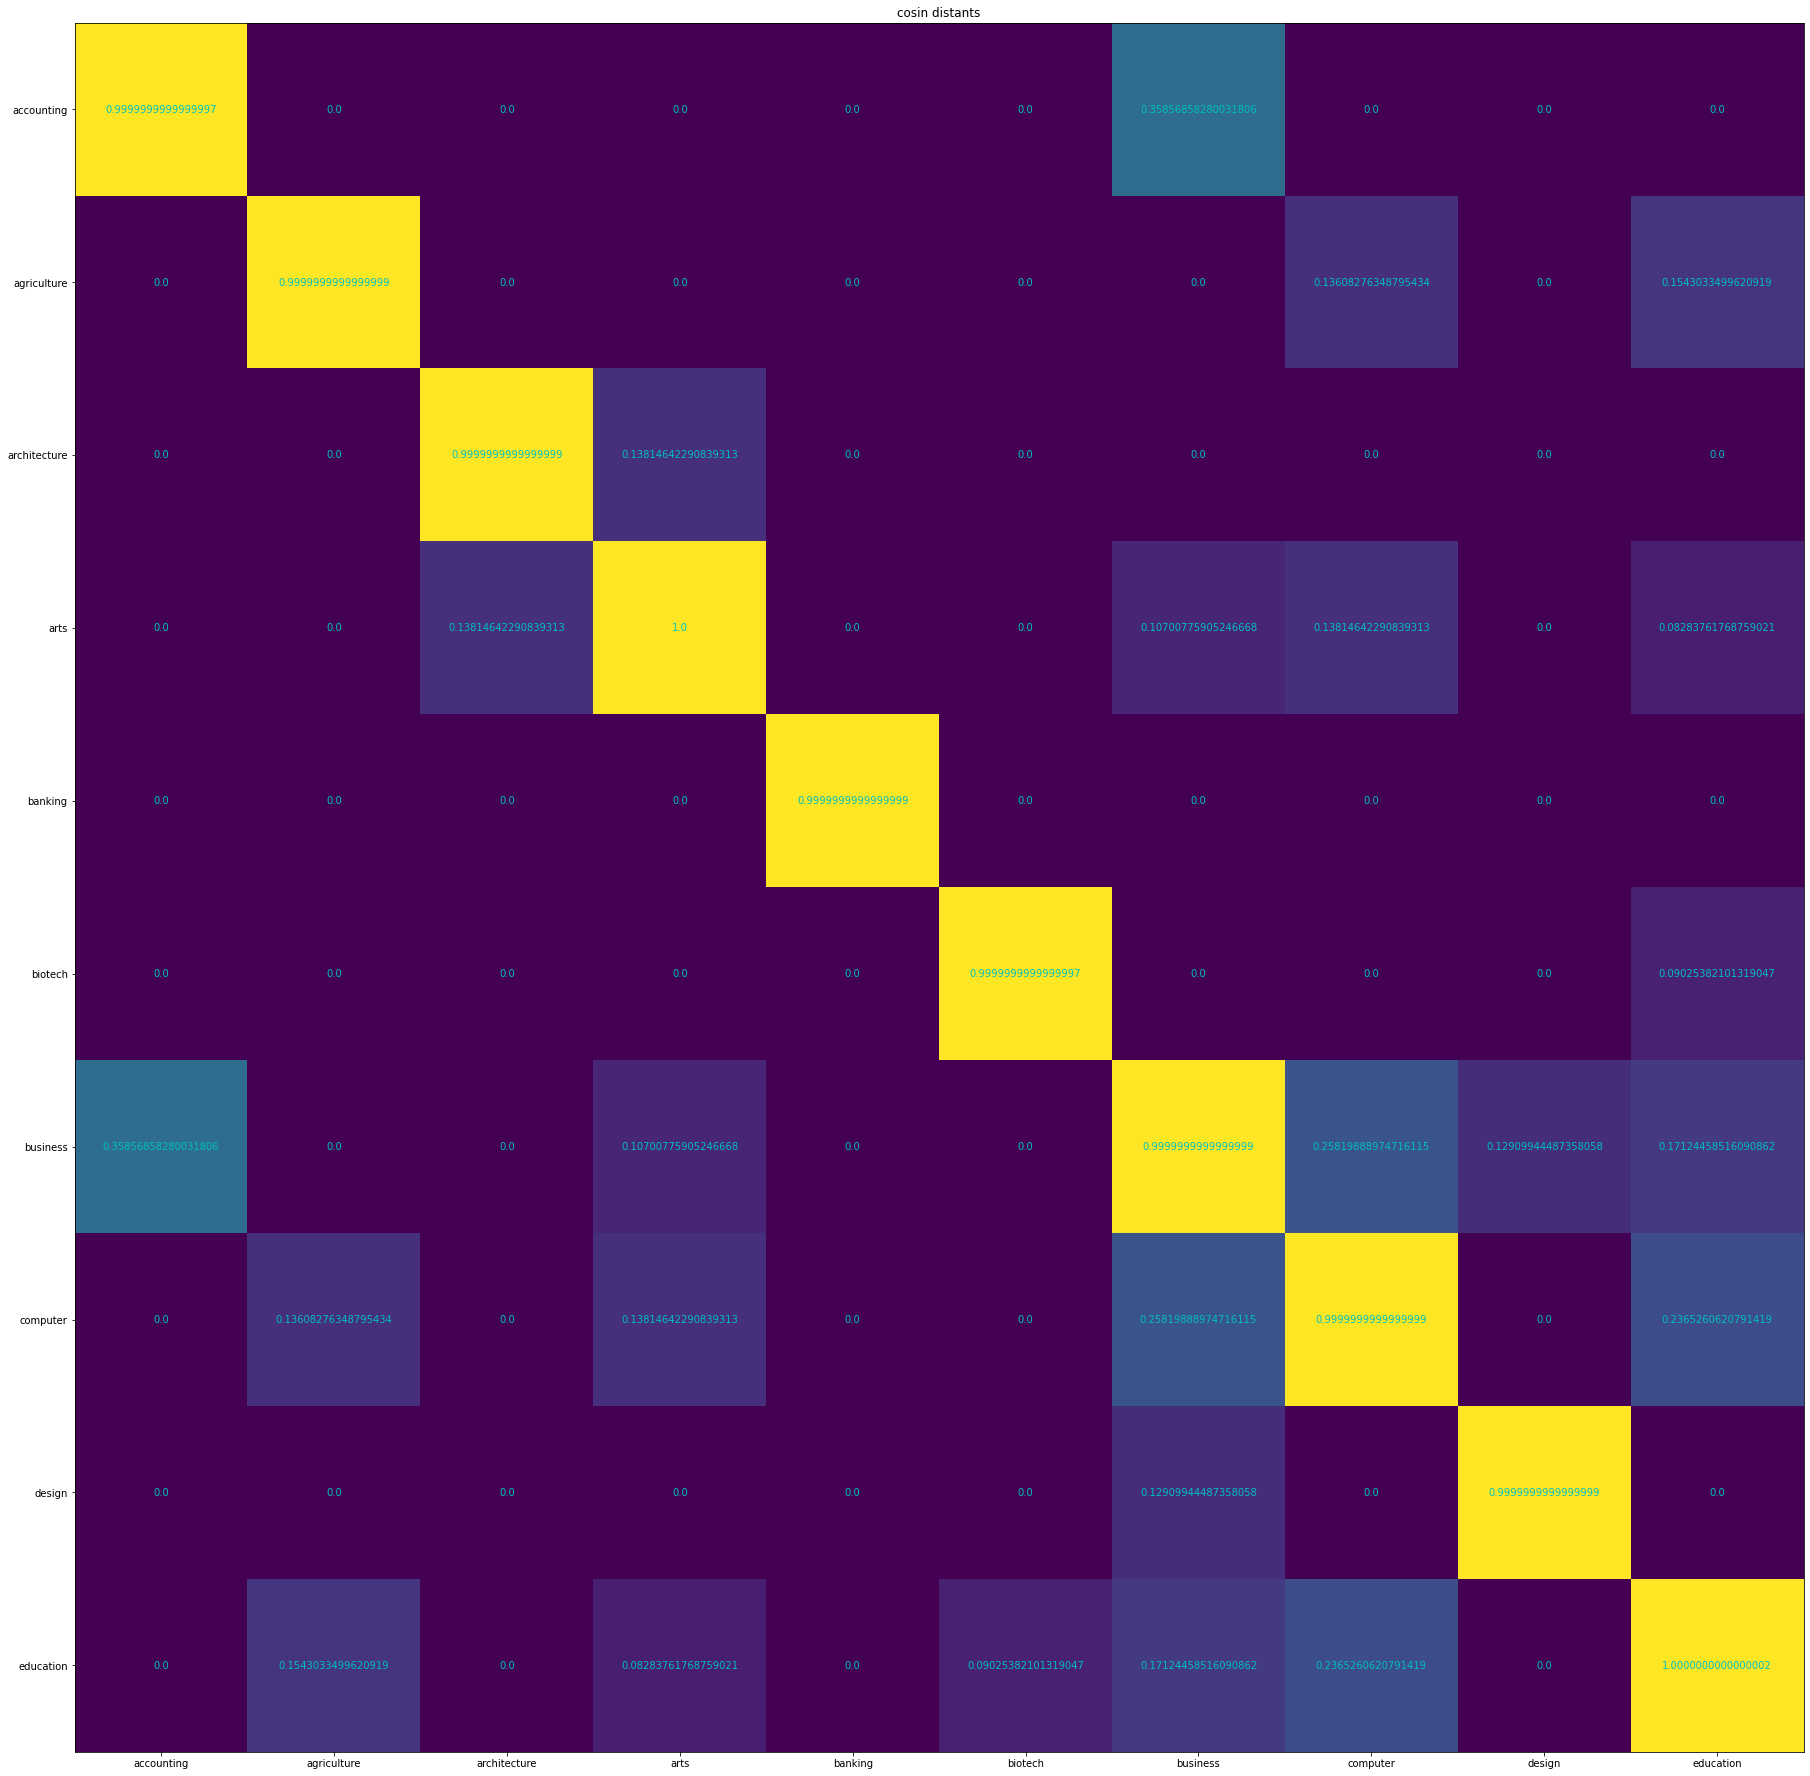

In [50]:
fig = plt.figure(figsize=(25, 25))
ax = plt.axes()
im = ax.imshow(test)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(names[0:10])))
ax.set_yticks(np.arange(len(names[0:10])))

ax.set_xticklabels(names[0:10])
ax.set_yticklabels(names[0:10])


for i in range(len(names[0:10])):
    for j in range(len(names[0:10])):
        text = ax.text(j, i, test[i, j],
                       ha="center", va="center", color="c")
        


ax.set_title("cosin distants")
fig.tight_layout()
plt.show()

#### 4.2 Save Image

In [51]:
fig.savefig('matrix.png')